In [4]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

Heavytailed distributions

In [5]:
import json
import pandas as pd
data_file = open('../Data/yelp/yelp_academic_dataset_business.json')
data = []
for line in data_file:
    data.append(json.loads(line))
review_df = pd.DataFrame(data)
data_file.close()

In [6]:
review_df['log_review_count'] = np.log10(review_df.review_count)

In [7]:
news_df = pd.read_csv('../Data/OnlineNewsPopularity/OnlineNewsPopularity.csv')

In [8]:
news_df['log_n_tokens_content'] = np.log10(news_df[' n_tokens_content'] + 1)

Using linear regression after log transform

In [9]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

m_orig = linear_model.LinearRegression()

In [10]:
scores_orig = cross_val_score(m_orig, review_df[['review_count']], review_df['stars'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, review_df[['log_review_count']], review_df['stars'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00354 (+/- 0.00148)
R-squared score with log transform: 0.00241 (+/- 0.00125)


In [14]:
scores_orig = cross_val_score(m_orig, news_df[[' n_tokens_content']], news_df[' shares'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, news_df[['log_n_tokens_content']], news_df[' shares'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='log_review_count', ylabel='stars'>

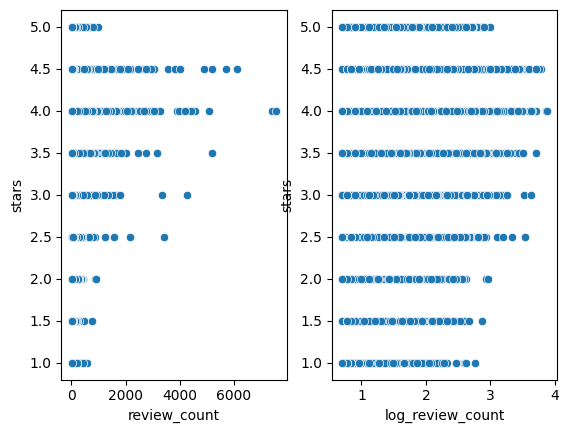

In [12]:
fig, axs = plt.subplots(ncols=2)
sns.scatterplot(
    x = review_df['review_count'],
    y = review_df['stars'],
    ax = axs[0]
)
sns.scatterplot(
    x = review_df['log_review_count'],
    y = review_df['stars'],
    ax = axs[1]
)

<Axes: xlabel='log_n_tokens_content', ylabel=' shares'>

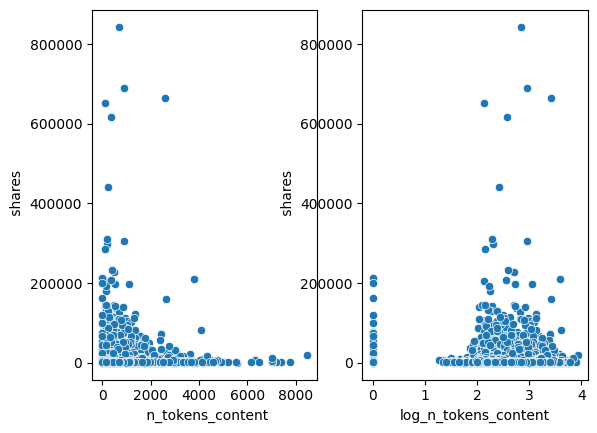

In [13]:
fig, axs = plt.subplots(ncols=2)
sns.scatterplot(
    x = news_df[' n_tokens_content'],
    y = news_df[' shares'],
    ax = axs[0]
)
sns.scatterplot(
    x = news_df['log_n_tokens_content'],
    y = news_df[' shares'],
    ax = axs[1]
)